# 1. Importing the modules

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# 2. Data Importing

In [5]:
data = pd.read_csv(r'C:\Users\udits\Downloads\athlete_events.csv\athlete_events.csv')
regions = pd.read_csv(r'C:\Users\udits\Downloads\noc_regions.csv')

# 3. Explore and Extract Information

In [7]:
data.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [8]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [9]:
data.info()
# Replace NaN values in 'height', 'weight', and 'age' with their respective means
data['Height'].fillna(data['Height'].mean(), inplace=True)
data['Weight'].fillna(data['Weight'].mean(), inplace=True)
data['Age'].fillna(data['Age'].mean(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


C:\Users\udits\AppData\Local\Temp\ipykernel_16976\1145357515.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Height'].fillna(data['Height'].mean(), inplace=True)
C:\Users\udits\AppData\Local\Temp\ipykernel_16976\1145357515.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [10]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


# 4. Joining the dataframes

Pandas 'merge' function will help us to join these two dataframes easily.

In [12]:
merged = pd.merge(data, regions, on='NOC', how='left')

In [13]:
merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


Since we can see a lot of NaN values in the medals section. Let's filter those values out. In case where NaN values are not visible easily we can use the below method.

In [15]:
merged.isnull().any()

ID        False
Name      False
Sex       False
Age       False
Height    False
Weight    False
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
region     True
notes      True
dtype: bool

Let's filter out NaN values. We don't need them.

In [17]:
medalmerged = merged[merged.Medal.notnull()]

In [18]:
medalmerged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
37,15,Arvo Ossian Aaltonen,M,30.0,175.33897,70.702393,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN
38,15,Arvo Ossian Aaltonen,M,30.0,175.33897,70.702393,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.00000,85.000000,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland,NaN
41,17,Paavo Johannes Aaltonen,M,28.0,175.00000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN


# Group data by country and count the number of medals

Text(0.5, 1.0, 'Top 10 Countries by Medal Count')

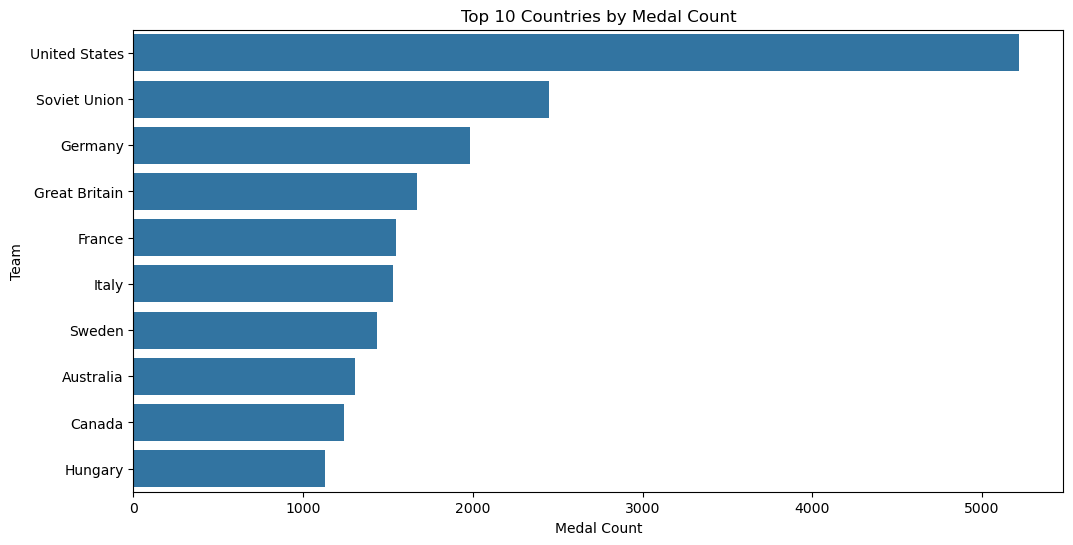

In [20]:


medal_counts = data[data['Medal'].notna()].groupby('Team').size().reset_index(name='Medal Count')

# Plot the top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(x='Medal Count', y='Team', data=medal_counts.nlargest(10, 'Medal Count'))
plt.title('Top 10 Countries by Medal Count')


# Group by year and count the number of athletes


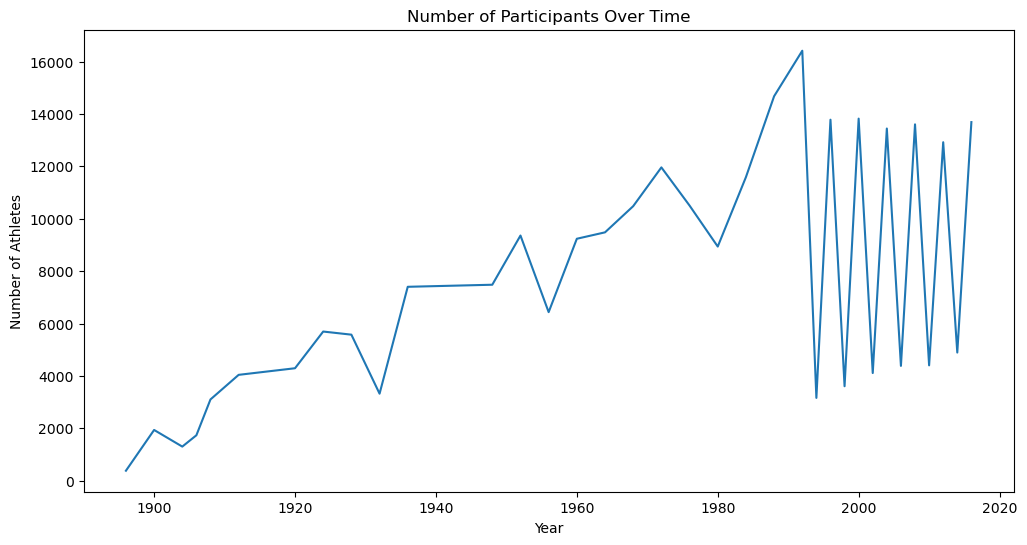

In [22]:
participants_by_year = data.groupby('Year').size().reset_index(name='Number of Athletes')
# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Number of Athletes', data=participants_by_year)
plt.title('Number of Participants Over Time')
plt.show()

# Plot the distribution of ages

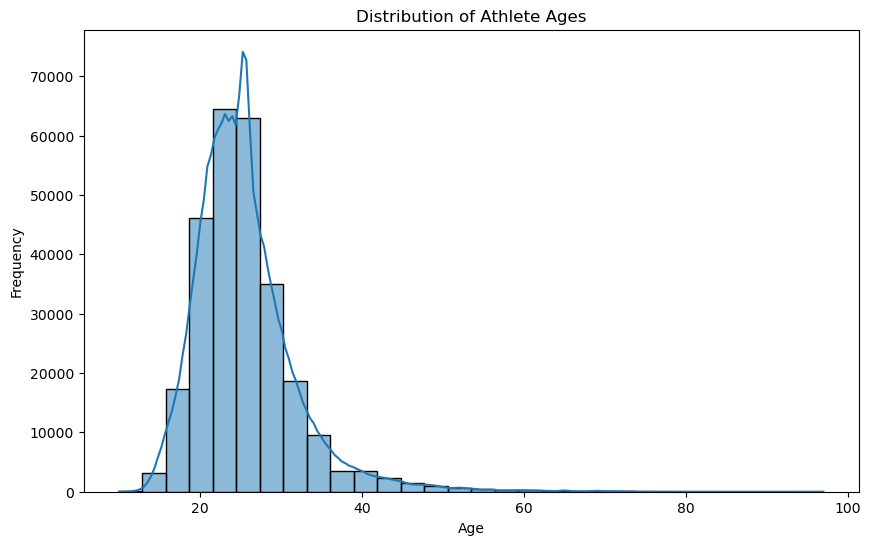

In [24]:

plt.figure(figsize=(10, 6))
sns.histplot(data['Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Athlete Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Facet grid of age distribution by gender and medal type

In [43]:
medal_order = ['Gold', 'Silver', 'Bronze']
data['Medal'] = pd.Categorical(data['Medal'], categories=medal_order, ordered=True)

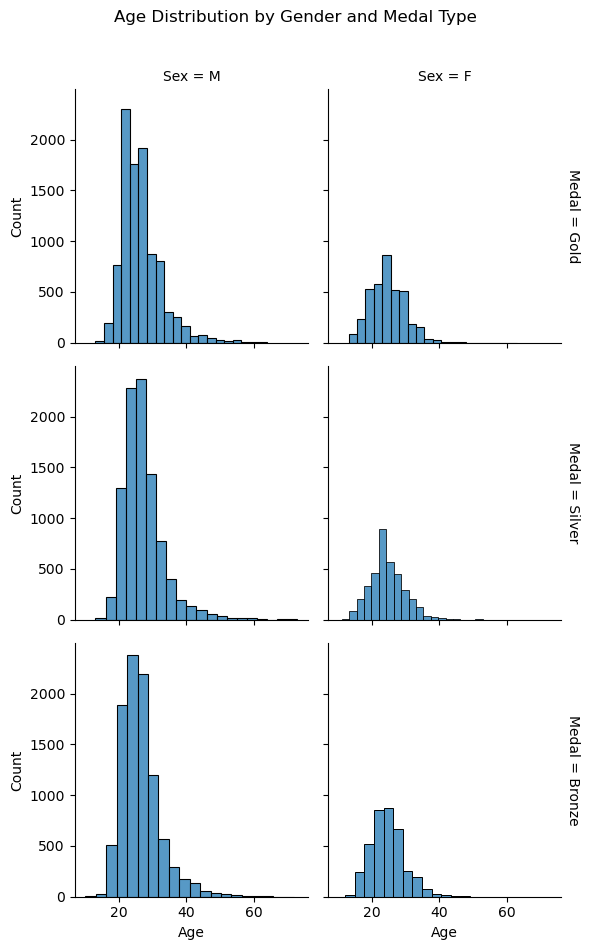

In [45]:

g = sns.FacetGrid(data.dropna(subset=['Medal', 'Age']), col='Sex', row='Medal', margin_titles=True)
g.map(sns.histplot, 'Age', bins=20)
g.fig.suptitle('Age Distribution by Gender and Medal Type', y=1.05)
plt.show()